In [50]:
import nltk
from nltk import word_tokenize
from ebooklib import epub
import ebooklib
from bs4 import BeautifulSoup
import re
import itertools
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [5]:
book = epub.read_epub('wok.epub')

In [6]:
toc = book.get_item_with_id('con01')

toc_pageSource = toc.get_content().decode('utf-8')

soup = BeautifulSoup(toc_pageSource, 'html.parser')

chapters = { file['id'].replace('a',''):{'chapterName':re.sub(".*\: ","",file.text)} for file in soup.find_all('a') if 'id' in file.attrs  }

for k in ['pt01','pt02','pt03','pt04','pt05','pt06','pt07','pt08','pt09',]:
    chapters.pop(k,None)
    
print(chapters)

{'fm02': {'chapterName': 'Prelude to the Stormlight Archive'}, 'ch01': {'chapterName': 'To Kill'}, 'ch02': {'chapterName': 'STORMBLESSED'}, 'ch03': {'chapterName': 'HONOR IS DEAD'}, 'ch04': {'chapterName': 'CITY OF BELLS'}, 'ch05': {'chapterName': 'THE SHATTERED PLAINS'}, 'ch06': {'chapterName': 'HERETIC'}, 'ch07': {'chapterName': 'BRIDGE FOUR'}, 'ch08': {'chapterName': 'ANYTHING REASONABLE'}, 'ch09': {'chapterName': 'NEARER THE FLAME'}, 'ch10': {'chapterName': 'DAMNATION'}, 'ch11': {'chapterName': 'STORIES OF SURGEONS'}, 'ch12': {'chapterName': 'DROPLETS'}, 'ch13': {'chapterName': 'ISHIKK'}, 'ch14': {'chapterName': 'NAN BALAT'}, 'ch15': {'chapterName': 'THE GLORY OF IGNORANCE'}, 'ch16': {'chapterName': 'UNITY'}, 'ch17': {'chapterName': 'TEN HEARTBEATS'}, 'ch18': {'chapterName': 'PAYDAY'}, 'ch19': {'chapterName': 'THE DECOY'}, 'ch20': {'chapterName': 'COCOONS'}, 'ch21': {'chapterName': 'A BLOODY, RED SUNSET'}, 'ch22': {'chapterName': 'HIGHPRINCE OF WAR'}, 'ch23': {'chapterName': 'STARF

In [40]:
for chId in chapters:
    item = book.get_item_with_id(chId)
    pageSource = item.get_content().decode('utf-8')
    soup = BeautifulSoup(pageSource, 'html.parser')
    chapters[chId]['chapterHead'] = [para.text.strip() for para in soup.find('div',attrs={'class':'chapterHead'}).find_all('p')]
    chapters[chId]['chapterBody'] = [para.text.strip() for para in soup.find('div',attrs={'class':'chapterBody'}).find_all('p')]
    print(chId,len(chapters[chId]['chapterHead']),len(chapters[chId]['chapterBody']))
    

fm02 0 45
ch01 3 129
ch02 3 142
ch03 3 143
ch04 3 123
ch05 3 113
ch06 3 134
ch07 3 221
ch08 3 186
ch09 3 236
ch10 3 67
ch11 1 73
ch12 3 112
ch13 1 67
ch14 1 32
ch15 1 73
ch16 2 254
ch17 2 118
ch18 2 142
ch19 2 312
ch20 1 189
ch21 2 210
ch22 2 293
ch23 2 193
ch24 1 30
ch25 2 183
ch26 2 183
ch27 2 209
ch28 2 132
ch29 1 114
ch30 2 191
ch31 2 306
ch32 2 330
ch33 1 88
ch34 1 69
ch35 1 83
ch36 3 252
ch37 3 121
ch38 1 61
ch39 3 156
ch40 3 201
ch41 3 74
ch42 3 46
ch43 3 179
ch44 1 229
ch45 3 63
ch46 3 87
ch47 3 173
ch48 1 81
ch49 3 205
ch50 3 176
ch51 1 173
ch52 3 273
ch53 3 254
ch54 1 165
ch55 3 138
ch56 3 111
ch57 3 52
ch58 1 72
ch59 1 48
ch60 1 59
ch61 1 79
ch62 3 233
ch63 3 82
ch64 3 188
ch65 3 192
ch66 3 118
ch67 3 327
ch68 3 232
ch69 3 229
ch70 3 150
ch71 3 130
ch72 3 169
ch73 3 81
ch74 3 112
ch75 3 104
ch76 3 69
ch77 3 287
ch78 3 204
ch79 3 258
ch80 1 85
ch81 1 86
ch82 1 42
ch83 1 149
ch84 1 31
ch85 1 70
bm01 1 49
end01 1 9
bm02 0 31


In [47]:
tokenized_sentences = [ word_tokenize(sent.lower()) for sentList in [ [ chapters[k]['chapterName'] ] + chapters[k]['chapterHead'] + chapters[k]['chapterBody'] for k in chapters ] for sent in sentList ]

print(len(tokenized_sentences),tokenized_sentences[0:10])

13052 [['prelude', 'to', 'the', 'stormlight', 'archive'], ['kalak', 'rounded', 'a', 'rocky', 'stone', 'ridge', 'and', 'stumbled', 'to', 'a', 'stop', 'before', 'the', 'body', 'of', 'a', 'dying', 'thunderclast', '.', 'the', 'enormous', 'stone', 'beast', 'lay', 'on', 'its', 'side', ',', 'riblike', 'protrusions', 'from', 'its', 'chest', 'broken', 'and', 'cracked', '.', 'the', 'monstrosity', 'was', 'vaguely', 'skeletal', 'in', 'shape', ',', 'with', 'unnaturally', 'long', 'limbs', 'that', 'sprouted', 'from', 'granite', 'shoulders', '.', 'the', 'eyes', 'were', 'deep', 'red', 'spots', 'on', 'the', 'arrowhead', 'face', ',', 'as', 'if', 'created', 'by', 'a', 'fire', 'burning', 'deep', 'within', 'the', 'stone', '.', 'they', 'faded', '.'], ['even', 'after', 'all', 'these', 'centuries', ',', 'seeing', 'a', 'thunderclast', 'up', 'close', 'made', 'kalak', 'shiver', '.', 'the', 'beast', '’', 's', 'hand', 'was', 'as', 'long', 'as', 'a', 'man', 'was', 'tall', '.', 'he', '’', 'd', 'been', 'killed', 'by',

In [48]:
unique_tokens = set ( [ tok for tokList in tokenized_sentences for tok in tokList  ])
len(unique_tokens),unique_tokens

(17229,
 {'formerly',
  'math',
  'consumes',
  'improper',
  'cove',
  'them—would',
  'script—and',
  '23',
  'identity',
  'martyr',
  'traffic',
  'broams',
  'tablecloths',
  'it…well',
  'offer',
  'prisoner',
  'grass',
  'inch',
  'arcanum',
  'dawn',
  'trading',
  'sorrow',
  'near-limitless',
  'flips',
  'stacks',
  'skin—not',
  'concrete',
  'betrayals',
  'fluttered',
  'notched',
  'except…',
  'nurtured',
  'situations—if',
  'slinging',
  'victorious',
  'highmarshal',
  'makeup',
  'furbished',
  'communications',
  'martial',
  'corl',
  'luxuriously',
  'steward—one',
  'water-filled',
  'satisfies',
  'ladyship',
  'airily',
  'closed-minded.',
  'lithely',
  'graduate',
  'optimism',
  'flurry',
  'stuck',
  'interpreted',
  'midnight',
  'turretlike',
  'attesting',
  'breezes',
  'uncultured',
  'waypoint',
  'insignia',
  'brothers',
  'lady-in-waiting',
  'often',
  'cost',
  'crumbs',
  'become',
  'foreboding',
  'hogshide',
  'waning',
  'dazzled',
  'stor

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


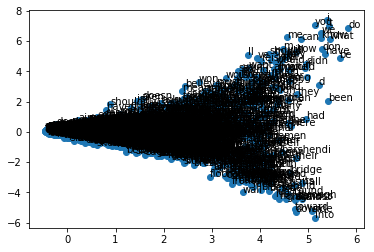

In [51]:
model = Word2Vec(tokenized_sentences, min_count=1)
X = model[model.wv.vocab]

pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)

for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()